# **Import Librarires**

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
from sklearn.ensemble import RandomForestRegressor


# Load the Dataset

In [143]:
car_data=pd.read_csv("/content/car_prediction_data.csv")

In [144]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA

In [145]:
car_data.shape

(301, 9)

In [146]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [147]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# preprocessing

In [148]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [149]:
car_data.nunique()

,0
Car_Name,98
Year,16
Selling_Price,156
Present_Price,147
Kms_Driven,206
Fuel_Type,3
Seller_Type,2
Transmission,2
Owner,3


In [150]:
car_data=car_data.drop("Car_Name",axis=1)

In [151]:
car_data.nunique()

,0
Year,16
Selling_Price,156
Present_Price,147
Kms_Driven,206
Fuel_Type,3
Seller_Type,2
Transmission,2
Owner,3


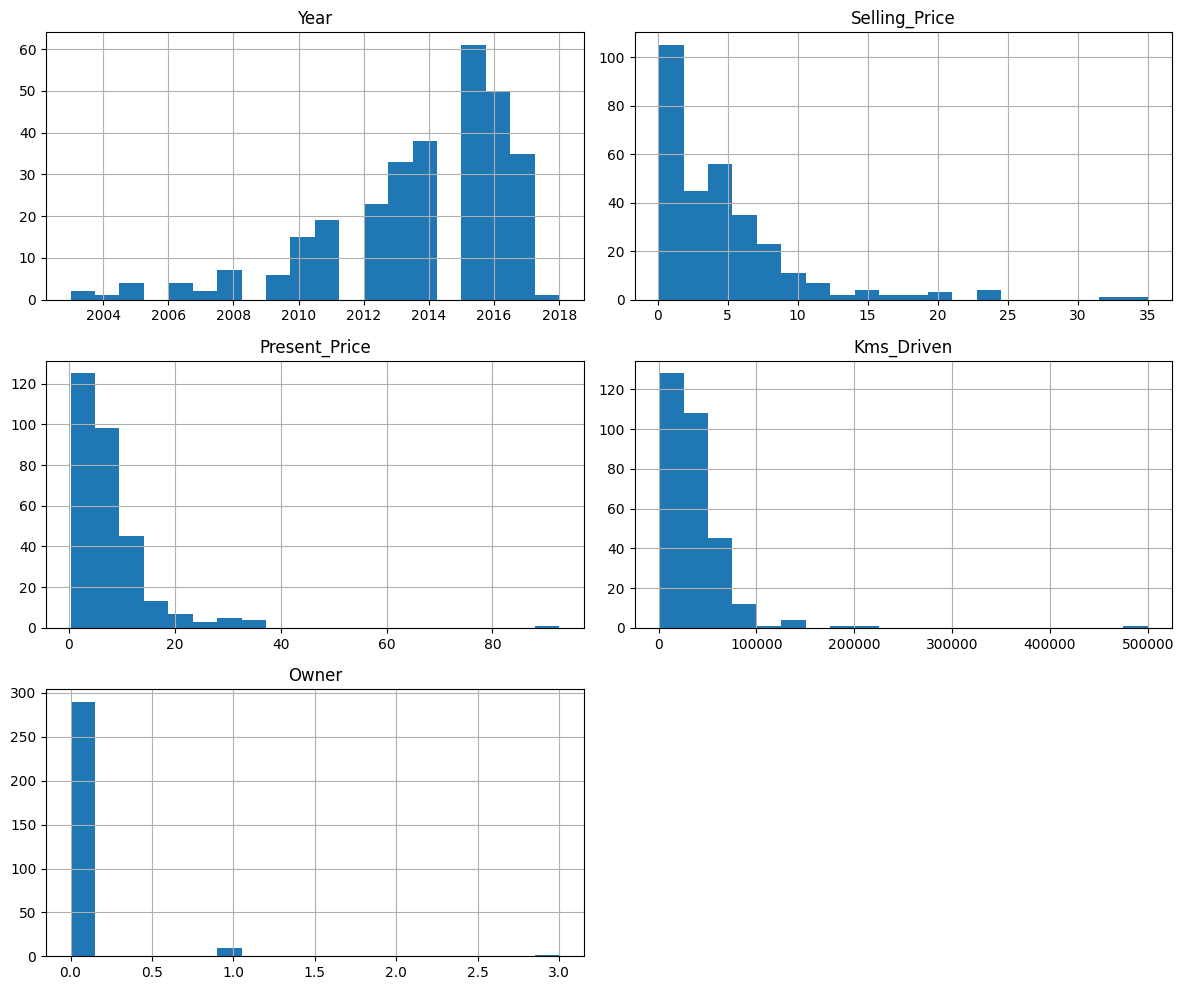

In [152]:
car_data.select_dtypes(include=["number"]).hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

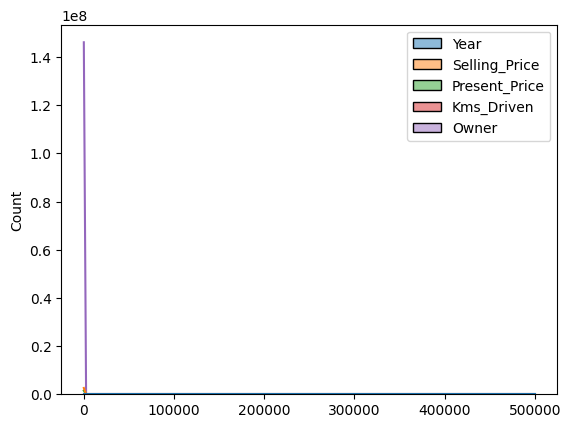

In [153]:
sns.histplot(car_data, bins=5, kde=True)
plt.show()

<Axes: >

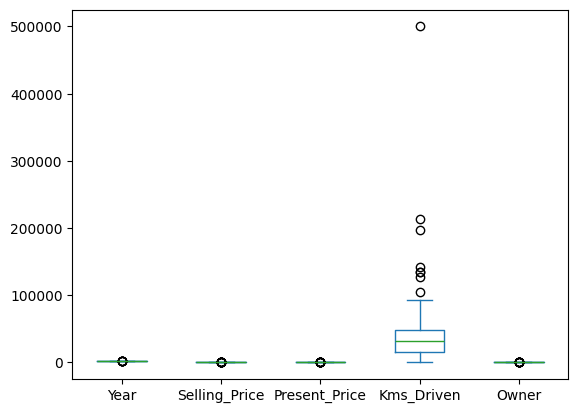

In [154]:
car_data.plot(kind="box")


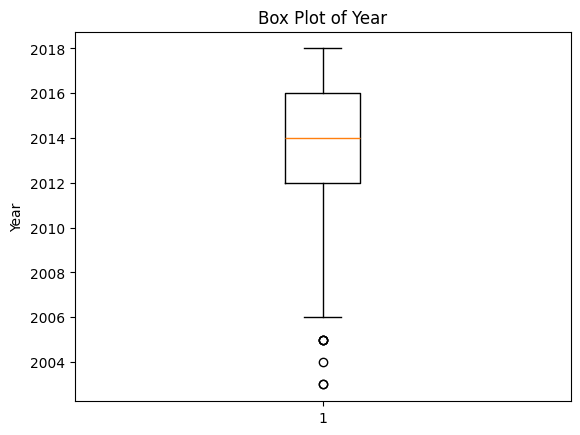

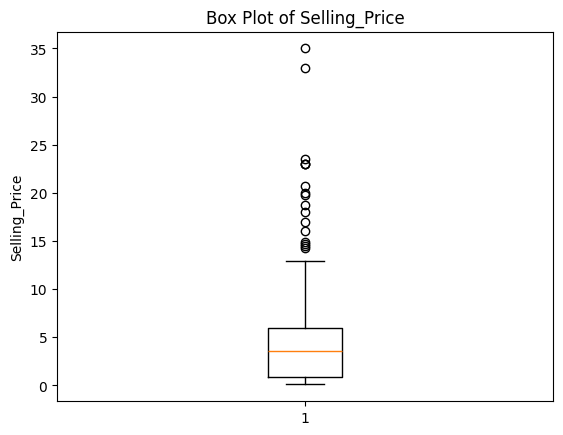

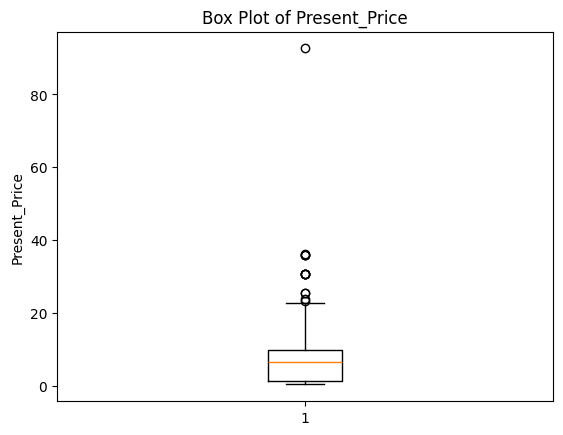

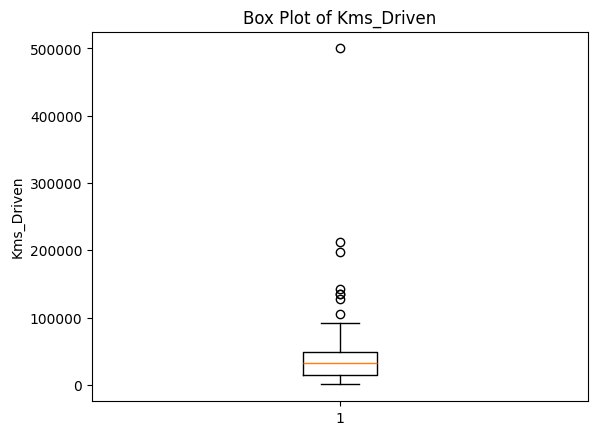

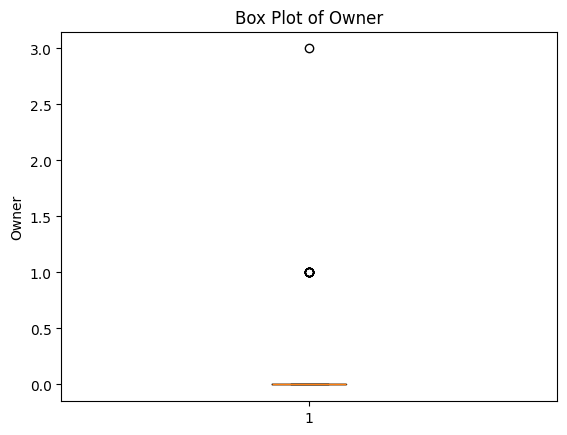

In [155]:
num_cols =car_data.select_dtypes(include=["number"]).columns
for col in num_cols:
  plt.figure()
  plt.boxplot(car_data[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()


## oulier handling

using iqr

In [156]:
Q1 = car_data['Kms_Driven'].quantile(0.25)
Q3 = car_data['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1


In [157]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [158]:
car_data = car_data[
    (car_data['Kms_Driven'] >= lower_bound) &
    (car_data['Kms_Driven'] <= upper_bound)
]


log transformation

In [159]:
car_data['Present_Price_log'] = np.log1p(car_data['Present_Price'])


/tmp/ipython-input-3216709271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['Present_Price_log'] = np.log1p(car_data['Present_Price'])


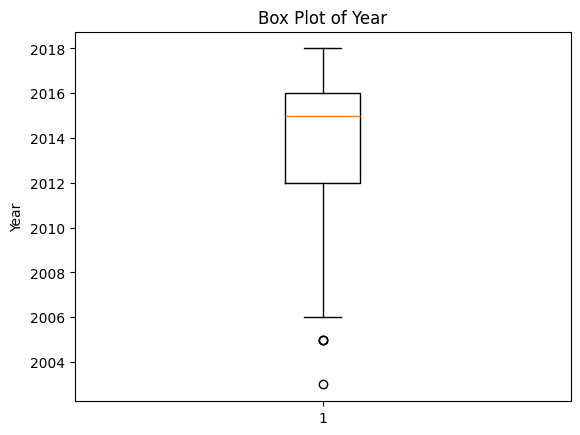

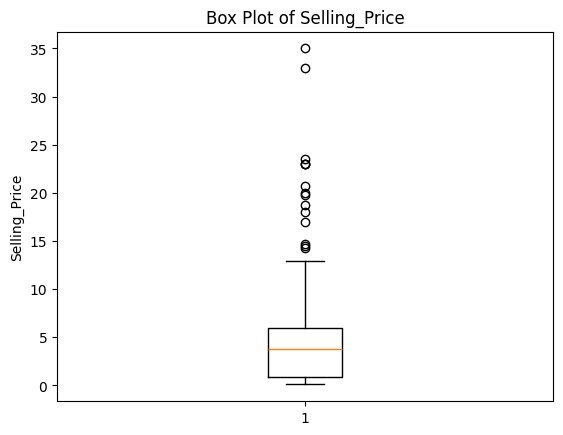

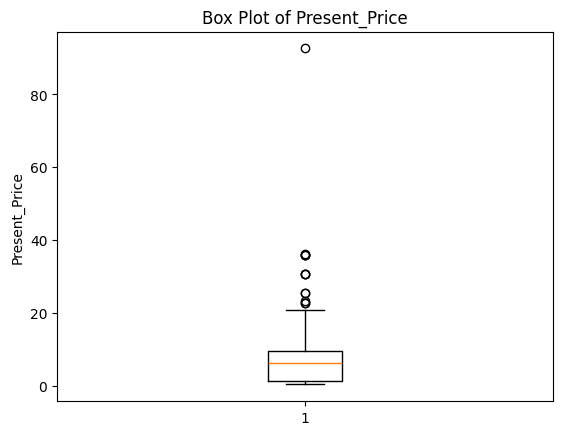

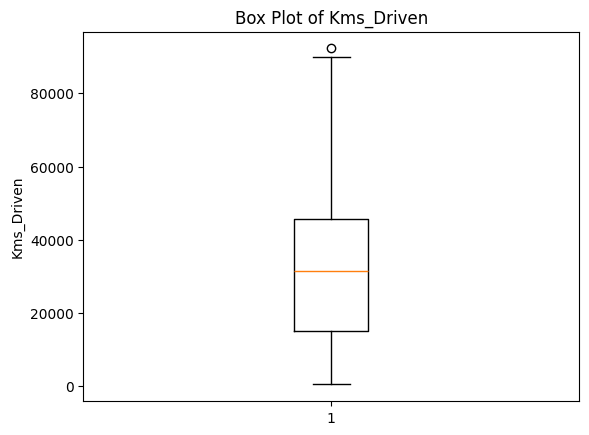

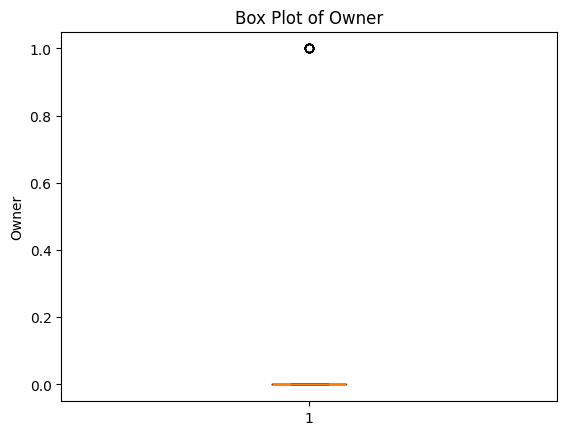

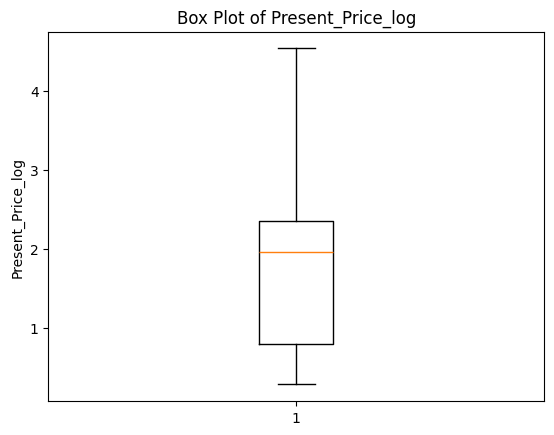

In [160]:
num_cols =car_data.select_dtypes(include=["number"]).columns
for col in num_cols:
  plt.figure()
  plt.boxplot(car_data[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

# Encoding

In [161]:
car_train_encode = pd.get_dummies(car_data, drop_first=True,dtype=int)


In [162]:
car_train_encode

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Present_Price_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.885553,0,1,0,1
1,2013,4.75,9.54,43000,0,2.355178,1,0,0,1
2,2017,7.25,9.85,6900,0,2.384165,0,1,0,1
3,2011,2.85,4.15,5200,0,1.638997,0,1,0,1
4,2014,4.60,6.87,42450,0,2.063058,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.533697,1,0,0,1
297,2015,4.00,5.90,60000,0,1.931521,0,1,0,1
298,2009,3.35,11.00,87934,0,2.484907,0,1,0,1
299,2017,11.50,12.50,9000,0,2.602690,1,0,0,1


# Scaling

In [163]:
scaler = MinMaxScaler()
data_scaled= scaler.fit_transform(car_train_encode)
data_scaled = pd.DataFrame(data_scaled, columns=car_train_encode.columns)


In [164]:
data_scaled

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Present_Price_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.733333,0.093123,0.057109,0.288882,0.0,0.377323,0.0,1.0,0.0,1.0
1,0.666667,0.133238,0.099913,0.463301,0.0,0.487527,1.0,0.0,0.0,1.0
2,0.933333,0.204871,0.103273,0.069768,0.0,0.494329,0.0,1.0,0.0,1.0
3,0.533333,0.078797,0.041504,0.051236,0.0,0.319464,0.0,1.0,0.0,1.0
4,0.733333,0.128940,0.070980,0.457305,0.0,0.418977,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
288,0.866667,0.269341,0.122237,0.365059,0.0,0.529419,1.0,0.0,0.0,1.0
289,0.800000,0.111748,0.060468,0.648622,0.0,0.388110,0.0,1.0,0.0,1.0
290,0.400000,0.093123,0.115735,0.953136,0.0,0.517970,0.0,1.0,0.0,1.0
291,0.933333,0.326648,0.131990,0.092660,0.0,0.545609,1.0,0.0,0.0,1.0


## split the data into X and y

In [165]:
X=data_scaled.drop(['Selling_Price'],axis=1)
y=data_scaled['Selling_Price']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
X_train.shape


(234, 9)

In [168]:
X_test.shape

(59, 9)

## linear regression

In [169]:
lin_model=LinearRegression()

In [170]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [171]:

pickle.dump(lin_model, open("car_price_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(X.columns, open("features.pkl", "wb"))

In [172]:
print(X_train.columns)


Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Present_Price_log',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')


In [173]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [174]:
pickle.dump(model, open("car_pred_model.pkl", "wb"))
